# This notebook redo turner mouse organoids seq similarity quantification and comparison with the re-sampling step
- re-sample to make sure randomly selected sequences are from similar distribution with the significant dTEs

In [105]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os

In [106]:
from matplotlib.patches import Patch

In [107]:
import sequence_comparison as seqComp

## generate re-sampled control df for the squire dataset

### load and prepare data

In [36]:
squire_indiv = pd.read_csv("/home/lucy/Dropbox/turner_organoid_bulk_RNA_local/Deseq_indiv_dTE_results.csv", header = 0, index_col = 0 )

In [37]:
squire_indiv.head()

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,repName,repFamily,repClass,genoName,genoStart,genoEnd,strand
0,"chr13|73480020|73480091|PB1D9:Alu:SINE|268|-,.",9.000885,-0.489762,0.629289,-0.778278,0.800222,1.0,TE,PB1D9:Alu:SINE,PB1D9:Alu:SINE_268,PB1D9,Alu,SINE,chr13,73480020,73480091,-
1,"chr5|117467874|117468005|RSINE1:B4:SINE|183|-,.",0.730917,-2.916743,3.081604,-0.946502,0.368835,1.0,TE,RSINE1:B4:SINE,RSINE1:B4:SINE_183,RSINE1,B4,SINE,chr5,117467874,117468005,-
2,"chr3|96619212|96619284|ID4:ID:SINE|194|+,.",5.772588,0.121464,0.852163,0.142536,0.942801,1.0,TE,ID4:ID:SINE,ID4:ID:SINE_194,ID4,ID,SINE,chr3,96619212,96619284,+
3,"chr15|93388865|93388965|PB1:Alu:SINE|227|-,.",32.028966,-0.216654,0.390147,-0.555314,0.978578,1.0,TE,PB1:Alu:SINE,PB1:Alu:SINE_227,PB1,Alu,SINE,chr15,93388865,93388965,-
4,"chr11|94175967|94176153|B2_Mm2:B2:SINE|98|-,.",7.127690,0.305487,0.591882,0.516129,0.893386,1.0,TE,B2_Mm2:B2:SINE,B2_Mm2:B2:SINE_98,B2_Mm2,B2,SINE,chr11,94175967,94176153,-


In [38]:
squire_df_ind = squire_indiv.index.astype(str) + "_" + squire_indiv['repName']
squire_indiv['df_index_repName'] = squire_df_ind

In [39]:
#squire_indiv.set_index( 'df_index_repName', inplace=True)

In [40]:
seqlen = squire_indiv['genoEnd'] - squire_indiv['genoStart']
squire_indiv['seqLen'] = seqlen

In [41]:
squire_indiv.shape

(15235, 19)

In [42]:
squire_sig = squire_indiv[squire_indiv['padj']< 1e-5] 
squire_sig.shape

(114, 19)

re-sampling step here

In [43]:
dTE_bs2, dTE_bp2, dTE_be2 = seqComp.get_target_distribution_bins( squire_sig, 'seqLen' , binw_constant= 0.2)

ret_df_ls2, smooth_s2, smooth_e2 = seqComp.match_bins( target_bin_starts = dTE_bs2 , target_bin_end = dTE_be2,
               pool_df = squire_indiv, pool_df_col_name = 'seqLen' )

smooth start set True
smooth end set True


/home/lucy/VU Basic Sciences Dropbox/Lucy Chen/telescope_run/sequence_comparison.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df[target_col_name] = target_df[target_col_name].astype(float)


In [44]:
bw2_resampled_df = seqComp.re_sample_pool_df( ret_df_ls2, smooth_s2, smooth_e2, dTE_bp2 , verbose=True) 

20
||||| Testting: Pre-adjustment probability list for the pool data is 
[0.009556624626186451, 0.8019763359771162, 0.08431933428682876, 0.03731634377844233, 0.013262254583279157, 0.010531790404368743, 0.005135873098426733, 0.0036406189052138865, 0.0062410609803666625, 0.0014302431413340268, 0.0016902873488493044, 0.0026654531270315952, 0.0015602652450916656, 0.006891171499154856, 0.00214536471200104, 0.0033155636458197892, 0.0031855415420621504, 0.001300221037576388, 0.0009101547263034716, 0.0013652320894552074, 0.0015602652450916656]
||||| Testting: Target probability list for the pool data is 
[0.001, 0.31484493886760767, 0.2273880114043833, 0.05247415647793461, 0.043728463731612176, 0.07871123471690192, 0.05247415647793461, 0.026237078238967305, 0.05247415647793461, 0.01749138549264487, 0.026237078238967305, 0.0009970089730807576, 0.008745692746322435, 0.008745692746322435, 0.008745692746322435, 0.008745692746322435, 0.0009970089730807576, 0.0009970089730807576, 0.00874569274632243

In [45]:
bw2_resampled_df.head()

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,repName,repFamily,repClass,genoName,genoStart,genoEnd,strand,df_index_repName,seqLen
10722,"chr4|155890118|155890193|B4:B4:SINE|308|-,.",1.096375,-3.502292,2.760993,-1.268490,0.233867,1.000000,TE,B4:B4:SINE,B4:B4:SINE_308,B4,B4,SINE,chr4,155890118,155890193,-,10722_B4,75
7084,"chr5|25895893|25896215|MTC:ERVL-MaLR:LTR|207|+,.",18.740915,-0.102457,0.388615,-0.263645,0.991822,1.000000,TE,MTC:ERVL-MaLR:LTR,MTC:ERVL-MaLR:LTR_207,MTC,ERVL-MaLR,LTR,chr5,25895893,25896215,+,7084_MTC,322
4049,"chr9|50517841|50517919|ID4:ID:SINE|205|+,.",5.407029,0.151806,0.806736,0.188173,0.930144,1.000000,TE,ID4:ID:SINE,ID4:ID:SINE_205,ID4,ID,SINE,chr9,50517841,50517919,+,4049_ID4,78
6510,"chr9|58376364|58376558|ID_B1:B4:SINE|284|+,.",19.337877,1.776631,0.412678,4.305124,0.029923,0.902737,TE,ID_B1:B4:SINE,ID_B1:B4:SINE_284,ID_B1,B4,SINE,chr9,58376364,58376558,+,6510_ID_B1,194
1217,"chr15|77807826|77808024|B3:B2:SINE|224|-,.",4.472705,0.816450,0.950662,0.858823,0.604570,1.000000,TE,B3:B2:SINE,B3:B2:SINE_224,B3,B2,SINE,chr15,77807826,77808024,-,1217_B3,198


In [47]:
bw2_resampled_df.shape

(958, 19)

In [64]:
# Compare distribution

In [61]:
cp = sn.color_palette("colorblind")
cp

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

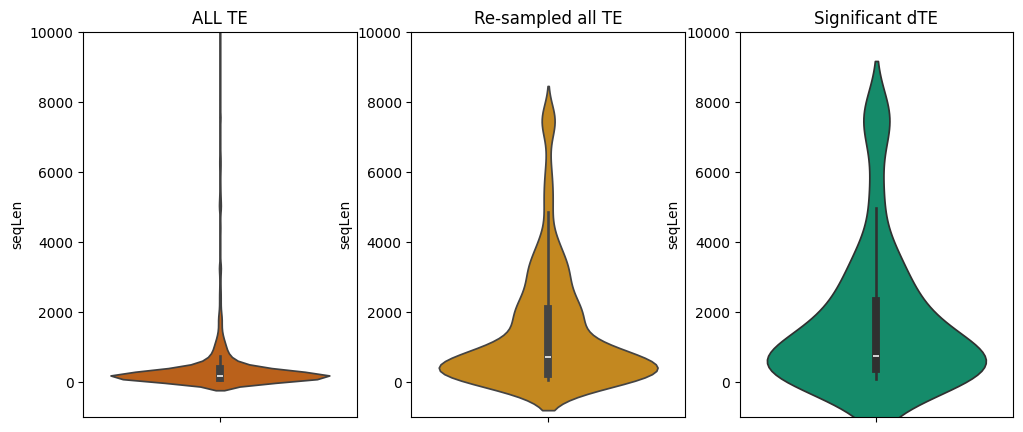

In [63]:
f,axes = plt.subplots( ncols=3, nrows = 1, figsize = [12,5])
sn.violinplot( squire_indiv['seqLen'], ax = axes[0], color = cp[3] )
axes[0].set_title("ALL TE")

sn.violinplot( bw2_resampled_df['seqLen'], ax = axes[1], color = cp[1] )
axes[1].set_title("Re-sampled all TE")

sn.violinplot( squire_sig['seqLen'], ax = axes[2], color = cp[2] )
axes[2].set_title("Significant dTE")


axes[0].set_ylim([-1000, 10000] )
axes[1].set_ylim( [-1000,10000])
axes[2].set_ylim( [-1000,10000])

plt.show()

## Get similarity scores for the re-sampled control data points

### save control ( randomly selected sample fasta)

In [48]:
mm39_path = '/home/lucy/Dropbox/mouse_ref_genome_mm39/mm39.fa'

In [49]:
resampled_df = bw2_resampled_df

In [50]:
rand_df_ls = []
rand_df_names = [] # rand{n_element}_{rep}

n_elements = [ 10, 20, 50 ]
nreps = 3

for ele in n_elements:
    for rep in range(nreps):
        subdf = resampled_df.sample( n = ele, random_state= 250+rep+ele ) #my number when I do research @_@
        rand_name = f"rand{ele}_{rep+1}"
        print( rand_name )

        rand_df_ls.append( subdf )
        rand_df_names.append( rand_name )


rand10_1
rand10_2
rand10_3
rand20_1
rand20_2
rand20_3
rand50_1
rand50_2
rand50_3


In [51]:
rand_df_ls[0].head()

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,repName,repFamily,repClass,genoName,genoStart,genoEnd,strand,df_index_repName,seqLen
1553,chr11|86099241|86099744|RLTR4_MM-int:LTR:LTR|2...,301.602766,-0.054947,0.105825,-0.519220,1.000000,1.0,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_294,RLTR4_MM-int,LTR,LTR,chr11,86099241,86099744,+,1553_RLTR4_MM-int,503
11552,"chr10|126882828|126882983|B3A:B2:SINE|280|+,.",9.529313,-0.498815,0.530811,-0.939722,0.829837,1.0,TE,B3A:B2:SINE,B3A:B2:SINE_280,B3A,B2,SINE,chr10,126882828,126882983,+,11552_B3A,155
11163,"chr3|105872890|105873023|B1_Mus1:Alu:SINE|286|-,.",5.906968,-0.078555,0.694792,-0.113063,0.967906,1.0,TE,B1_Mus1:Alu:SINE,B1_Mus1:Alu:SINE_286,B1_Mus1,Alu,SINE,chr3,105872890,105873023,-,11163_B1_Mus1,133
8570,chr4|49475323|49475699|RLTR4_MM-int:LTR:LTR|32...,5.167232,-0.129073,0.779219,-0.165644,0.941822,1.0,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_320,RLTR4_MM-int,LTR,LTR,chr4,49475323,49475699,+,8570_RLTR4_MM-int,376
10988,"chr17|32763322|32763486|MT2B:ERVL:LTR|290|-,.",6.477771,0.415987,0.730929,0.569121,0.814213,1.0,TE,MT2B:ERVL:LTR,MT2B:ERVL:LTR_290,MT2B,ERVL,LTR,chr17,32763322,32763486,-,10988_MT2B,164


In [52]:
rand_df_ls[1].head()

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,repName,repFamily,repClass,genoName,genoStart,genoEnd,strand,df_index_repName,seqLen
9749,chr11|86773882|86781441|RLTR4_MM-int:LTR:LTR|2...,50.875769,4.617053,1.056281,4.371045,0.000308,0.019474,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_20,RLTR4_MM-int,LTR,LTR,chr11,86773882,86781441,+,9749_RLTR4_MM-int,7559
8116,chr15|37896571|37899225|RMER3D-int:ERVK:LTR|14...,5.347996,0.793885,0.831874,0.954333,0.613369,1.000000,TE,RMER3D-int:ERVK:LTR,RMER3D-int:ERVK:LTR_140,RMER3D-int,ERVK,LTR,chr15,37896571,37899225,-,8116_RMER3D-int,2654
4909,chr4|123020361|123020490|Cheshire:hAT-Charlie:...,8.074900,1.955353,0.667198,2.930696,0.076092,1.000000,TE,Cheshire:hAT-Charlie:DNA,Cheshire:hAT-Charlie:DNA_336,Cheshire,hAT-Charlie,DNA,chr4,123020361,123020490,-,4909_Cheshire,129
9965,"chr13|38159142|38159325|B2_Mm2:B2:SINE|93|-,.",10.468076,-0.588716,0.543489,-1.083216,0.777131,1.000000,TE,B2_Mm2:B2:SINE,B2_Mm2:B2:SINE_93,B2_Mm2,B2,SINE,chr13,38159142,38159325,-,9965_B2_Mm2,183
547,"chr12|81394077|81397777|L1MdFanc_I:L1:LINE|51|-,.",4.553234,-0.366250,0.977400,-0.374719,0.822718,1.000000,TE,L1MdFanc_I:L1:LINE,L1MdFanc_I:L1:LINE_51,L1MdFanc_I,L1,LINE,chr12,81394077,81397777,-,547_L1MdFanc_I,3700


In [53]:
region_df_cols = ['genoName', 'genoStart', 'genoEnd', 'strand', 'df_index_repName' ]

In [54]:
for i,d in enumerate( rand_df_ls):
    seqComp.extract_ucsc_bedlike_regions( genome_fasta= mm39_path,
                                         regions_df= d[region_df_cols ], 
                                         output_fasta='./sequence_similarity_input/' + 'resampledSquire_' + rand_df_names[i] +'.fasta') 

✅ Extracted sequences saved to: ./sequence_similarity_input/resampledSquire_rand10_1.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/resampledSquire_rand10_2.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/resampledSquire_rand10_3.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/resampledSquire_rand20_1.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/resampledSquire_rand20_2.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/resampledSquire_rand20_3.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/resampledSquire_rand50_1.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/resampledSquire_rand50_2.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/resampledSquire_rand50_3.fasta


### calculate similarity score

In [55]:
import time

In [56]:
input_dir = './sequence_similarity_input/'

In [57]:
fnames = pd.Series( os.listdir( input_dir ) )
fnames = fnames[ fnames.str.startswith( 'resampledSquire') ]
fnames

2     resampledSquire_rand20_3.fasta
5     resampledSquire_rand20_1.fasta
13    resampledSquire_rand50_3.fasta
17    resampledSquire_rand10_2.fasta
20    resampledSquire_rand50_1.fasta
21    resampledSquire_rand20_2.fasta
27    resampledSquire_rand10_1.fasta
35    resampledSquire_rand10_3.fasta
40    resampledSquire_rand50_2.fasta
dtype: object

In [58]:
for f in fnames:
    print( f'Processing {f}')
    TIME_S = time.time()
    seqComp.process_group(input_dir + f, out_dir="sequence_similarity_results", n_jobs=4,plot_heatmap=True )
    TIME_E = time.time()
    TOTAL_TIME = (TIME_E - TIME_S)/60
    print( f"Time used: {TOTAL_TIME:.1f} min" )

Processing resampledSquire_rand20_3.fasta
Loaded 20 sequences from ./sequence_similarity_input/resampledSquire_rand20_3.fasta
Average identity: 27.85% ± 18.43%
Time used: 0.2 min
Processing resampledSquire_rand20_1.fasta
Loaded 20 sequences from ./sequence_similarity_input/resampledSquire_rand20_1.fasta
Average identity: 29.09% ± 19.91%
Time used: 0.2 min
Processing resampledSquire_rand50_3.fasta
Loaded 50 sequences from ./sequence_similarity_input/resampledSquire_rand50_3.fasta
Average identity: 30.18% ± 18.67%
Time used: 0.7 min
Processing resampledSquire_rand10_2.fasta
Loaded 10 sequences from ./sequence_similarity_input/resampledSquire_rand10_2.fasta
Average identity: 22.30% ± 19.01%
Time used: 0.1 min
Processing resampledSquire_rand50_1.fasta
Loaded 50 sequences from ./sequence_similarity_input/resampledSquire_rand50_1.fasta
Average identity: 29.92% ± 19.92%
Time used: 1.1 min
Processing resampledSquire_rand20_2.fasta
Loaded 20 sequences from ./sequence_similarity_input/resampledS

### make summary df from the similarity result

In [ ]:
# TODO: 
# get rand summary df
# load mut and wt summary df
# compare

In [65]:
fnames =pd.Series( os.listdir("./sequence_similarity_results/") )
fnames = fnames[fnames.str.startswith("resampledSquire")  ]

In [66]:
fnames

0     resampledSquire_rand10_3_pairwise_identity.csv
2     resampledSquire_rand10_1_pairwise_identity.csv
4     resampledSquire_rand20_1_pairwise_identity.csv
17    resampledSquire_rand50_1_pairwise_identity.csv
19    resampledSquire_rand50_2_pairwise_identity.csv
25    resampledSquire_rand50_3_pairwise_identity.csv
39    resampledSquire_rand20_3_pairwise_identity.csv
43    resampledSquire_rand10_2_pairwise_identity.csv
46    resampledSquire_rand20_2_pairwise_identity.csv
dtype: object

In [67]:
num_elements = [ int(f.split("_")[1].split('d')[1]) for f in fnames ]
print( num_elements )
f_ids = [ "_".join( f.split("_")[1:3] ) for f in fnames ]
print( f_ids )

[10, 10, 20, 50, 50, 50, 20, 10, 20]
['rand10_3', 'rand10_1', 'rand20_1', 'rand50_1', 'rand50_2', 'rand50_3', 'rand20_3', 'rand10_2', 'rand20_2']


In [68]:
rand_summary_df = pd.DataFrame(index = ['avg_pctIdentity', 'std_pctIdentity', 'num_element'])
rand_df_ls = []

for i,tf in enumerate( fnames):
    # get data meta information
    f_id = f_ids[i]
    num = int( num_elements[i] )
    
    # load df
    df = pd.read_csv("./sequence_similarity_results/" + tf, header = 0, index_col = None )
    
    #get avg and std score
    avg_score = df['PercentIdentity'].mean()
    std_score = df['PercentIdentity'].std()

    # add result to the result df
    rand_summary_df[ f_id ] = [ avg_score, std_score, num ]
    rand_df_ls.append( df )
    
    
    

In [69]:
#df_ls[0]

In [70]:
rand_summary_df

,rand10_3,rand10_1,rand20_1,rand50_1,rand50_2,rand50_3,rand20_3,rand10_2,rand20_2
avg_pctIdentity,35.063549,40.356476,29.092206,29.921150,28.327657,30.178891,27.849240,22.302109,26.859416
std_pctIdentity,17.495267,12.963896,19.964576,19.923259,19.561513,18.678217,18.482266,19.222331,20.841313
num_element,10.000000,10.000000,20.000000,50.000000,50.000000,50.000000,20.000000,10.000000,20.000000


In [71]:
rand_summary_df.loc['condition'] = ['control' for i in range( rand_summary_df.shape[1]) ]

In [72]:
rand_summary_df = rand_summary_df.T

In [73]:
rand_summary_df.head()

,avg_pctIdentity,std_pctIdentity,num_element,condition
rand10_3,35.063549,17.495267,10.0,control
rand10_1,40.356476,12.963896,10.0,control
rand20_1,29.092206,19.964576,20.0,control
rand50_1,29.92115,19.923259,50.0,control
rand50_2,28.327657,19.561513,50.0,control


In [74]:
rand_summary_df.sort_values( by = 'num_element', ascending= True , inplace= True )

In [76]:
rand_summary_df.head()

,avg_pctIdentity,std_pctIdentity,num_element,condition
rand10_3,35.063549,17.495267,10.0,control
rand10_1,40.356476,12.963896,10.0,control
rand10_2,22.302109,19.222331,10.0,control
rand20_1,29.092206,19.964576,20.0,control
rand20_3,27.84924,18.482266,20.0,control


### combine control and experimental conditions

In [77]:
wt_summary_df = pd.read_csv("./squire_tjp2_wt_seq_similarity_summary_df.csv", header = 0, index_col= 0 )
mut_summary_df = pd.read_csv("./squire_tjp2_mut_seq_similarity_summary_df.csv", header = 0, index_col= 0 )

In [78]:
wt_summary_df.head()

,avg_pctIdentity,std_pctIdentity,num_element,condition
wt_up_33,29.435993,19.757601,33.0,wt_up
wt_up_20,27.326824,19.316601,20.0,wt_up
wt_up_10,24.427313,18.360094,10.0,wt_up


In [79]:
mut_summary_df.head()

,avg_pctIdentity,std_pctIdentity,num_element,condition
mut_up_top20,30.920809,26.255202,20.0,mutant_up
mut_up_top10,29.135368,23.714132,10.0,mutant_up
mut_up_last50,30.864983,20.974193,50.0,mutant_up
mut_up_top50,31.567832,24.140729,50.0,mutant_up


In [80]:
total_summary_df = pd.concat( [ rand_summary_df, mut_summary_df, wt_summary_df], axis = 0, ignore_index= False )

In [81]:
total_summary_df.head()

,avg_pctIdentity,std_pctIdentity,num_element,condition
rand10_3,35.063549,17.495267,10.0,control
rand10_1,40.356476,12.963896,10.0,control
rand10_2,22.302109,19.222331,10.0,control
rand20_1,29.092206,19.964576,20.0,control
rand20_3,27.84924,18.482266,20.0,control


<Axes: xlabel='num_element', ylabel='std_pctIdentity'>

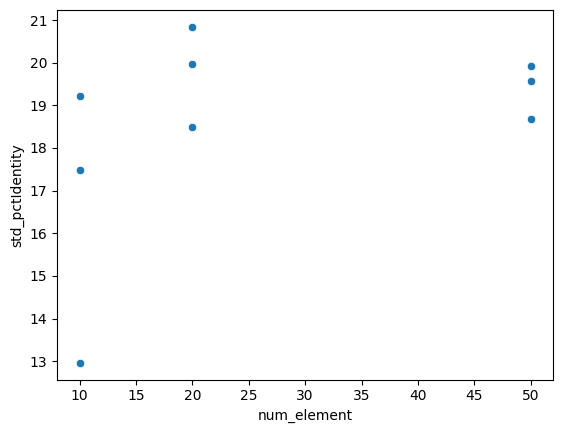

In [84]:
sn.scatterplot( data = rand_summary_df, x = 'num_element', y = 'std_pctIdentity' )

## Visualize similarity score across conditions

In [109]:
total_summary_df = pd.read_csv("./squire_tjp2_total_seq_similarity_summary_df.csv", header = 0 ,index_col = 0)

In [108]:
condition_colors = {
    'control': 'gray',
    'mutant_up': 'salmon',
    'wt_up':'cornflowerblue'
}

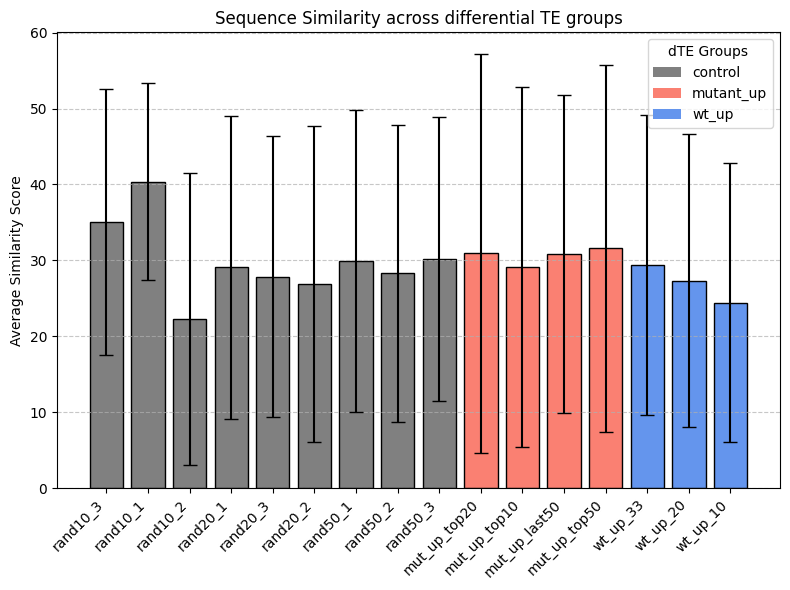

In [82]:
bar_colors = [condition_colors[cond] for cond in total_summary_df['condition'] ]

plt.figure(figsize=(8, 6))


plt.bar(total_summary_df.index, total_summary_df['avg_pctIdentity'] , yerr=total_summary_df['std_pctIdentity'], capsize=5, color=bar_colors, edgecolor='black')

plt.xticks(rotation=45, ha='right') 

legend_elements = [Patch(facecolor=color, label=cond) for cond, color in condition_colors.items()]
plt.legend(handles=legend_elements, title='dTE Groups ')

plt.ylabel('Average Similarity Score')
plt.title('Sequence Similarity across differential TE groups')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


In [85]:
sum_of_sum_df = total_summary_df.groupby('condition').mean()

In [86]:
sum_of_sum_df

,avg_pctIdentity,std_pctIdentity,num_element
condition,,,
control,29.994522,18.570293,26.666667
mutant_up,30.622248,23.771064,32.5
wt_up,27.063377,19.144766,21.0


In [97]:
# plt.bar( x = sum_of_sum_df.index, height= sum_of_sum_df['avg_pctIdentity'],
#         yerr=sum_of_sum_df['std_pctIdentity'], capsize = 5, edgecolor='black', 
#         color = ['cornflowerblue' , 'salmon' ,'grey'] )
# plt.title( 'Avg. Pct Sequence Identity across Conditions')
# plt.show()

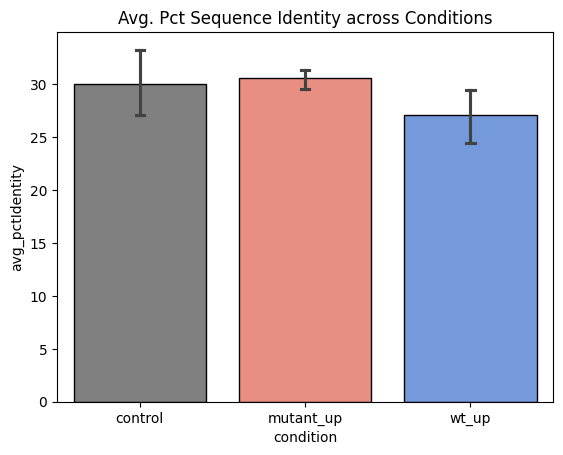

In [99]:
sn.barplot( total_summary_df, y ='avg_pctIdentity' , x = 'condition' , hue= 'condition', palette= condition_colors, edgecolor = 'black', capsize = 0.05 )
plt.title( 'Avg. Pct Sequence Identity across Conditions')
plt.show()

<Axes: xlabel='condition', ylabel='avg_pctIdentity'>

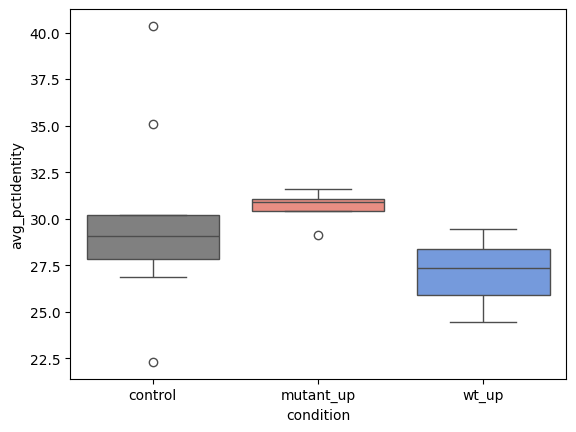

In [89]:
sn.boxplot( total_summary_df, y ='avg_pctIdentity' , x = 'condition' , hue= 'condition', palette= condition_colors )

## calculate p-values

In [110]:
from scipy import stats

ctrl = total_summary_df['avg_pctIdentity'][total_summary_df['condition'] == 'control']
mut = total_summary_df['avg_pctIdentity'][total_summary_df['condition'] == 'mutant_up']
# Assuming equal variances (default)
t_statistic, p_value = stats.ttest_ind(list(mut), list( ctrl) )

In [111]:
[t_statistic, p_value]

[0.2370783897099611, 0.8169533466823745]

In [112]:
wt = total_summary_df['avg_pctIdentity'][total_summary_df['condition'] == 'wt_up']

In [113]:
t_mut_wt, p_mut_wt = stats.ttest_ind(list(mut), list( wt) )

In [114]:
[t_mut_wt, p_mut_wt ]

[2.6129609267420646, 0.04749962652707692]

In [115]:
t_wt_ctrl, p_wt_ctrl = stats.ttest_ind(list(wt), list( ctrl) )

In [116]:
[t_wt_ctrl, p_wt_ctrl]

[-0.931163184826455, 0.37370317467097247]

## save data

In [100]:
logi = pd.read_csv("./OUTPUT_EXPLAIN.csv", header = 0 ,index_col= 0 )

In [101]:
logi.columns

Index(['count_table_indiv.csv', 'count_table_subF.csv', 'mm39_rmsk_full.tsv',
       'Deseq_indiv_locus_results.csv', 'genoLoc_Deseq_indiv_locus_result.csv',
       'compare_dTE_overlap/', 'genoLoc_TCPS_Deseq_indiv_locus_result.csv',
       'TCPS_all_Deseq_indiv_locus.csv', 'resampled_TCPS_all_TE_indi.csv',
       'TCPS_seq_similarity_summary_df.csv',
       'squire_tjp2_mut_seq_similarity_summary_df.csv',
       'squire_tjp2_wt_seq_similarity_summary_df.csv'],
      dtype='object')

In [10]:
logi['compare_dTE_overlap/']

nb_created                                                    3
nb_updated                                                  NaN
explain       this folder contains temporary files used to c...
Name: compare_dTE_overlap/, dtype: object

In [119]:
total_summary_df.to_csv("./squire_tjp2_total_seq_similarity_summary_df.csv", header = True, index = True )

In [118]:
logi['squire_tjp2_total_seq_similarity_summary_df.csv']= ['4d' , 'NA' , 'summary df for sequence similarity scores for all conditinos for the squire TE quantification of turner mouse organoids. Includes WT, KO and randomly selected control samples']

In [117]:
logi

,count_table_indiv.csv,count_table_subF.csv,mm39_rmsk_full.tsv,Deseq_indiv_locus_results.csv,genoLoc_Deseq_indiv_locus_result.csv,compare_dTE_overlap/,genoLoc_TCPS_Deseq_indiv_locus_result.csv,TCPS_all_Deseq_indiv_locus.csv,resampled_TCPS_all_TE_indi.csv,TCPS_seq_similarity_summary_df.csv,squire_tjp2_mut_seq_similarity_summary_df.csv,squire_tjp2_wt_seq_similarity_summary_df.csv,squire_tjp2_total_seq_similarity_summary_df.csv
nb_created,1,1,downloaded from ucsc table browser,R1,3,3,5a,6,6,5b,4c,4c,4d
nb_updated,NaN,NaN,1,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NA
explain,count table obtained from combining the final_...,count table obtained from the indiv count tabl...,"added the column of transcript_id, which is th...",Deseq result individual loci level. Generated ...,Derived from the Deseq_indiv_locus_results csv...,this folder contains temporary files used to c...,Derived from the TCPS Deseq individual locus r...,Modified from Dropbox/TCPS_TE_results/TE_indi_...,TCPS TE re-sampled to fit seqLen distribution ...,Sequence similarity summary df including all c...,seq similarity summary df for turner mouse TJP...,seq similarity summary df for turner mouse TJP...,summary df for sequence similarity scores for ...


In [120]:
logi.to_csv("./OUTPUT_EXPLAIN.csv", header =True, index = True )